# Import Packages

In [47]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Importing librarys to use on interactive graphs
from plotly.offline import init_notebook_mode, iplot, plot 
import plotly.graph_objs as go 
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# to set a style to all graphs
plt.style.use('fivethirtyeight')
init_notebook_mode(connected=True)

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [57]:
color = ["#"+''.join([random.choice('0123456789') for j in range(6)])
             for i in range(20)]

# Load Data

In [31]:
%%time
# Load data
df_train = pd.read_csv('train_nohits.csv')

CPU times: user 29.1 s, sys: 4.42 s, total: 33.5 s
Wall time: 37.4 s


In [32]:
df_train['revenue_status'] = df_train.t_transactionRevenue.apply(lambda x: 0 if math.isnan(x) else 1)

# EDA

### Target Variables

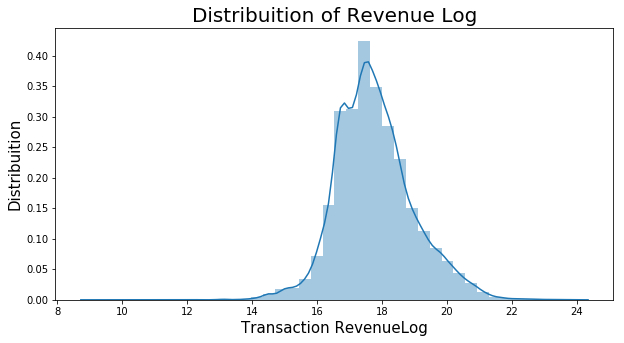

In [33]:
# seting the figure size of our plots
plt.figure(figsize=(10,5))

ax = sns.distplot(np.log(df_train[df_train['t_transactionRevenue'] > 0]["t_transactionRevenue"] + 0.01), bins=40, kde=True)
ax.set_xlabel('Transaction RevenueLog', fontsize=15) # seting the xlabel and size of font
ax.set_ylabel('Distribuition', fontsize=15) # seting the ylabel and size of font
ax.set_title("Distribuition of Revenue Log", fontsize=20) # seting the title and size of font

plt.show()

### Percentage of people purchased in store

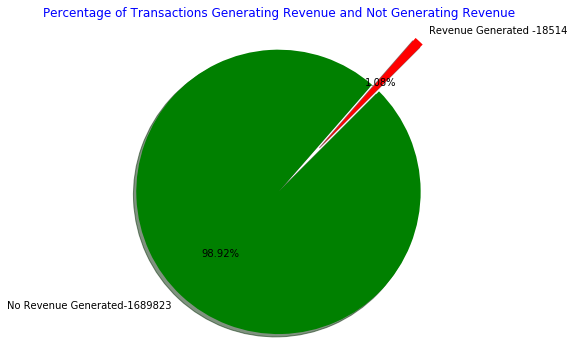

In [35]:
#UNDERSTANDING NUMBER OF TRANSACTIONS GENERATING REVENUE
pie_labels=['Revenue Generated -'+str(df_train['revenue_status'][df_train.revenue_status==1].count()),'No Revenue Generated-'+
            str(df_train['revenue_status'][df_train.revenue_status==0].count())]
pie_share=[df_train['revenue_status'][df_train.revenue_status==1].count() / df_train['revenue_status'].count(),
           df_train['revenue_status'][df_train.revenue_status==0].count() / df_train['revenue_status'].count()]

figureObject, axesObject = plt.subplots(figsize=(6,6))
pie_colors=('red','green')
pie_explode=(.30,.15)
axesObject.pie(pie_share,labels=pie_labels,explode=pie_explode,autopct='%.2f%%',colors=pie_colors,startangle=45,shadow=True)
axesObject.axis('equal')
plt.title('Percentage of Transactions Generating Revenue and Not Generating Revenue',color='blue',fontsize=12)
plt.show()

We can see only 1.08% customer generated revenue

### Device Browsers

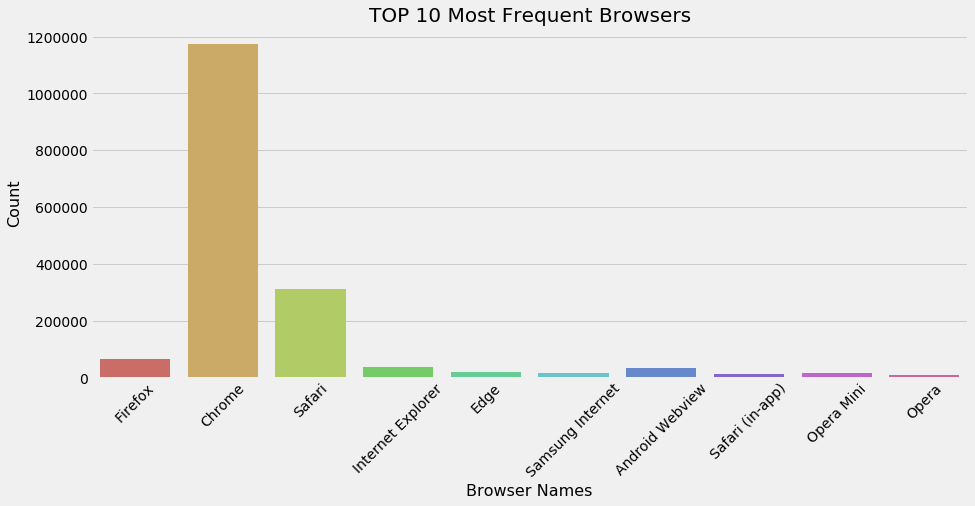

In [63]:
# seting the graph size
plt.figure(figsize=(14,6))

# Let explore the browser used by users
sns.countplot(df_train[df_train['d_browser']\
                       .isin(df_train['d_browser']\
                             .value_counts()[:10].index.values)]['d_browser'], palette="hls") # It's a module to count the category's
plt.title("TOP 10 Most Frequent Browsers", fontsize=20) # Adding Title and seting the size
plt.xlabel("Browser Names", fontsize=16) # Adding x label and seting the size
plt.ylabel("Count", fontsize=16) # Adding y label and seting the size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels

plt.show() #use plt.show to render the graph that we did above

Most of the revenues generated from Chrome

### Channel groups

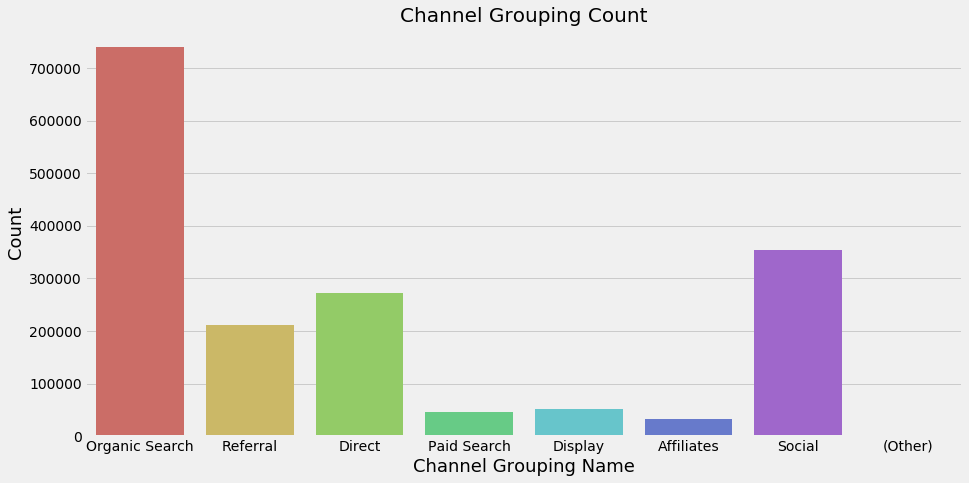

In [66]:
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["channelGrouping"], palette="hls") # It's a module to count the category's
plt.title("Channel Grouping Count", fontsize=20) # seting the title size
plt.xlabel("Channel Grouping Name", fontsize=18) # seting the x label size
plt.ylabel("Count", fontsize=18) # seting the y label size

plt.show() #use plt.show to render the graph that we did above

Organic Search generated most of the revenues

<br>

### Operation System

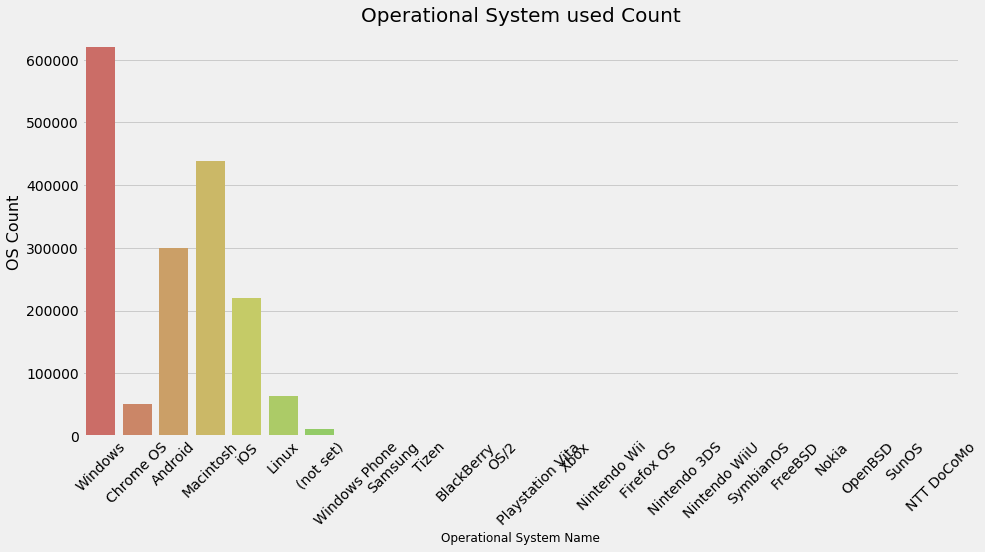

In [71]:
# seting the graph size
plt.figure(figsize=(14,7))

# let explore the browser used by users
sns.countplot(df_train["d_operatingSystem"], palette="hls") # It's a module to count the category's
plt.title("Operational System used Count", fontsize=20) # seting the title size
plt.xlabel("Operational System Name", fontsize=12) # seting the x label size
plt.ylabel("OS Count", fontsize=16) # seting the y label size
plt.xticks(rotation=45) # Adjust the xticks, rotating the labels
plt.show() #use plt.show to render the graph that we did above

Windows generated large part of the revenues

<br>

### Device Category

In [45]:
PieChart("d_deviceCategory", "Device Category")

Desktop generated most of the revenues

<br>

### GeoNetwork City

In [52]:
PieChart("geo_city", "Top Cities by Accesses and Revenue", limit=12)

### Geo networkDomain

In [56]:
PieChart('geo_networkDomain', "Network Domain")

### Traffic Sources

In [58]:
PieChart("ts_medium", "Trafic Source - Medium")

In [36]:
def PieChart(df_colum, title, limit=15):
    """
    This function helps to investigate the proportion of visits and total of transction revenue 
    by each category
    """

    count_trace = df_train[df_colum].value_counts()[:limit].to_frame().reset_index()
    rev_trace = df_train.groupby(df_colum)["t_transactionRevenue"].sum().nlargest(10).to_frame().reset_index()

    trace1 = go.Pie(labels=count_trace['index'], values=count_trace[df_colum], name= "% Acesses", hole= .5, 
                    hoverinfo="label+percent+name", showlegend=True,domain= {'x': [0, .48]}, 
                    marker=dict(colors = color))

    trace2 = go.Pie(labels=rev_trace[df_colum], 
                    values=rev_trace['t_transactionRevenue'], name="% Revenue", hole= .5, 
                    hoverinfo="label + percent+name", showlegend=False, domain= {'x': [.52, 1]})

    layout = dict(title= title, height=450, font=dict(size=15),
                  annotations = [
                      dict(
                          x=.25, y=.5,
                          text='Visits', 
                          showarrow=False,
                          font=dict(size=20)
                      ),
                      dict(
                          x=.80, y=.5,
                          text='Revenue', 
                          showarrow=False,
                          font=dict(size=20)
                      )
        ])

    fig = dict(data=[trace1, trace2], layout=layout)
    iplot(fig)